# Braitenberg Navigation

In [1]:
%matplotlib inline
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
from ipywidgets import *
import image_utils as iutils

(240, 320, 3)


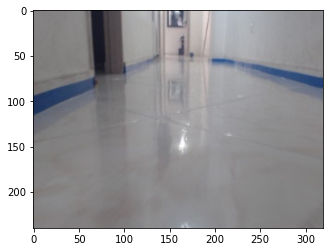

In [3]:
img_lane = cv2.imread('dataSet3/image_1628786135241.jpg')
plt.imshow(cv2.cvtColor(img_lane, cv2.COLOR_BGR2RGB))
print(img_lane.shape)

In [4]:
(height, width) = img_lane.shape[:2]

# Interactive UI to get parameters for braitenberg windows #

In [5]:
rectange_w_s        = IntSlider(min=10, max=120, step=10, value=10)
rectange_h_s        = IntSlider(min=10, max=120, step=10, value=40)
margin_horizontal_s = IntSlider(min=0, max= 120, step=10, value=50)
margin_top_s        = IntSlider(min=0, max=120, step= 10, value=70)

def get_corners(rectange_w, rectange_h, margin_horizontal, margin_top):
    corners_region_l = [
        (margin_horizontal, margin_top),
        (margin_horizontal, rectange_h+margin_top),
        (margin_horizontal+rectange_w, rectange_h+margin_top),
        (margin_horizontal+rectange_w, margin_top)
    ]
    corners_region_r = [
        (width-margin_horizontal-rectange_w, margin_top), 
        (width-margin_horizontal-rectange_w, rectange_h+margin_top),
        (width-margin_horizontal, rectange_h+margin_top),
        (width-margin_horizontal, margin_top)
    ]
    img_region_lines = iutils.draw_region(img_lane, corners_region_l, corners_region_r)

    plt.imshow(cv2.cvtColor(img_region_lines, cv2.COLOR_BGR2RGB))
    plt.show()
    
    return (margin_horizontal, margin_top)

interact(get_corners, rectange_w=rectange_w_s, rectange_h=rectange_h_s, margin_horizontal=margin_horizontal_s, margin_top=margin_top_s)

interactive(children=(IntSlider(value=10, description='rectange_w', max=120, min=10, step=10), IntSlider(value…

<function __main__.get_corners(rectange_w, rectange_h, margin_horizontal, margin_top)>

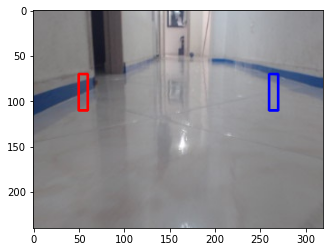

In [6]:
rectange_w = 10
rectange_h = 40

# margin_horizontal = 100
margin_horizontal = 50
margin_top = 70

corners_region_l = [
    (margin_horizontal, margin_top),
    (margin_horizontal, rectange_h+margin_top),
    (margin_horizontal+rectange_w, rectange_h+margin_top),
    (margin_horizontal+rectange_w, margin_top)
]
corners_region_r = [
    (width-margin_horizontal-rectange_w, margin_top), 
    (width-margin_horizontal-rectange_w, rectange_h+margin_top),
    (width-margin_horizontal, rectange_h+margin_top),
    (width-margin_horizontal, margin_top)
]
img_region_lines = iutils.draw_region(img_lane, corners_region_l, corners_region_r)

plt.imshow(cv2.cvtColor(img_region_lines, cv2.COLOR_BGR2RGB))

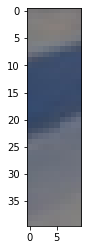

In [7]:
img_l = img_lane[
    corners_region_l[0][1]:corners_region_l[2][1],
    corners_region_l[0][0]:corners_region_l[2][0],
    :
]
plt.imshow(cv2.cvtColor(img_l, cv2.COLOR_BGR2RGB))

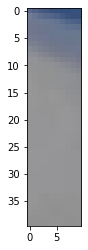

In [8]:
img_r = img_lane[
    corners_region_r[0][1]:corners_region_r[2][1],
    corners_region_r[0][0]:corners_region_r[2][0],
    :
]
plt.imshow(cv2.cvtColor(img_r, cv2.COLOR_BGR2RGB))

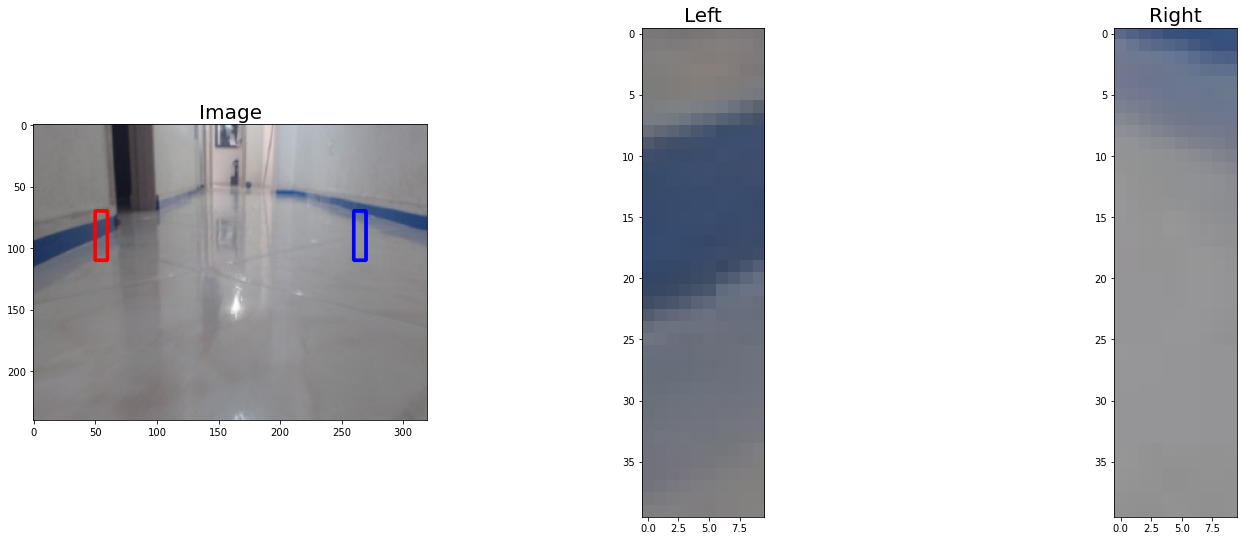

In [9]:
img_region_rgb = iutils.draw_region(img_lane, corners_region_l, corners_region_r)
img_l_color, img_r_color = iutils.get_left_right_regions_color(img_lane, corners_region_l, corners_region_r)
iutils.show_left_right_rgb(img_region_rgb, img_l_color, img_r_color)

In [10]:
hsv_img_lane = cv2.cvtColor(img_lane, cv2.COLOR_BGR2HSV)

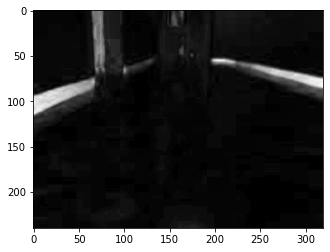

In [11]:
selected_channel = hsv_img_lane[:,:,1]
plt.imshow(selected_channel, cmap='gray')

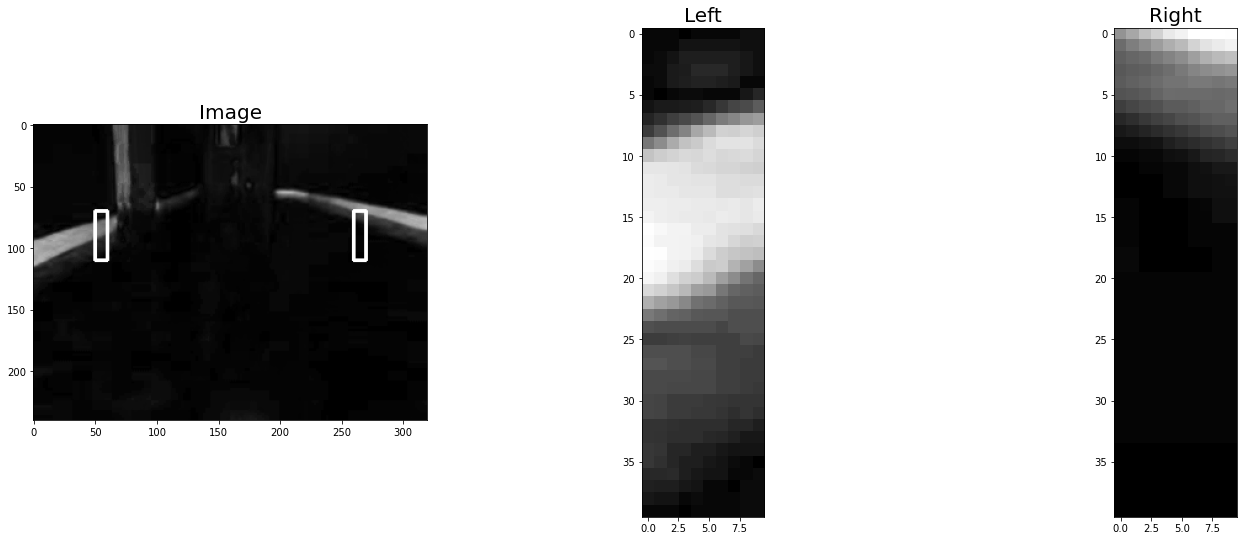

In [12]:
img_region_gray = iutils.draw_region_gray(selected_channel, corners_region_l, corners_region_r)
img_l_gray, img_r_gray = iutils.get_left_right_regions_gray(selected_channel, corners_region_l, corners_region_r)
iutils.show_left_right_gray(img_region_gray, img_l_gray, img_r_gray)

In [13]:
def binary(img, thresh_min, thresh_max):
    binary = np.zeros_like(img)
    binary[(img >= thresh_min) & (img <= thresh_max)] = 1
    return binary

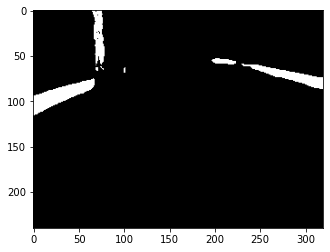

In [14]:
b_image = binary(selected_channel, 80, 255)
plt.imshow(b_image, cmap='gray')

In [15]:
# kernel = np.ones((5,5), np.uint8)
# b_image = cv2.erode(b_image, kernel, iterations=1)
# b_image = cv2.dilate(b_image, kernel, iterations=1)

# plt.imshow(b_image, cmap='gray')

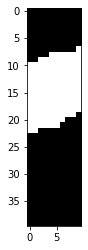

In [16]:
b_image_l = binary(img_l_gray, 80, 255)
plt.imshow(b_image_l, cmap='gray')

In [17]:
b_image_l.sum()

129

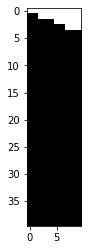

In [18]:
b_image_r = binary(img_r_gray, 80, 255)
plt.imshow(b_image_r, cmap='gray')

In [19]:
b_image_r.sum()

26

In [20]:
def check_activation(img_region, active_value):
    b_image_region = binary(img_region, 80, 255)
    return b_image_region.sum() > active_value

In [21]:
check_activation(img_l_gray, 80)

True

In [22]:
check_activation(img_r_gray, 80)

False

In [23]:
def check_both_activation(img_l_gray, img_r_gray, active_value):
    activation_l = check_activation(img_l_gray, active_value)
    activation_r = check_activation(img_r_gray, active_value)
    return activation_l, activation_r

In [24]:
check_both_activation(img_l_gray, img_r_gray, 80)

(True, False)